Dataset that we have selected is TMDB movie data.It contains information about the 10k movies which also inculdes popularity of the movies.It inculdes budget,revenue,cast and genres also.
Data provided here is suitable to analyze the trends in the movies industry,Genres popularity and expensive movies.

In [2]:
# Importing packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 22)

# Data Wrangling
    General Properties
       load the data from tmdb-movies.csv and preview it

In [3]:
#read the csv file and preview it
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Info regarding the column,data types and non null values

In [4]:
##Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# Statistical info regarding the numeric columns

In [5]:
##DataFrame - describe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Observations

1.Columns
  We will drop the columns named: id,imdb_id,homepage,tagline and overview. Below are the reasons to remove the columns
    1.Drop the columns id and imdb_id as it will contribute to analysis purpose
    2.The homepage column have 8000 missing values we can remove this column
    3.We can identify the movie by title alone so tagline can be removed.
    4.Overview column is not used for analysis purpose so it can be removed
    

2.Values
  Some column values will need split,other column values need to be replaced with mean and other column values should be    dropped.Genres column should contain multiple values separated by a separator "|" and need to split it for further analysis.
  Budget_Adj and revenue_adj contains zero values so need to replace those zeros with mean.
  
  
3.What will we analyze
  1 We will vizualise three trends in the movie industry with the data provided (raising movies released per year, raising   popularity of the movies and raising adjusted profit).
  2 We will find out what is the genre that has the most movies released ever, also what are the genres of the most popular   movies for the last five years.
  

    



# Data Cleaning
Remove the columns as stated in the introduction

In [6]:
#drop the columns id,imdb_id,homepage,tagline and overview
df.drop(['id','imdb_id','homepage','tagline','overview'], axis=1, inplace=True)

In [14]:
#view the dataframe after the drop
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We have to check our duplicates in our data and remove them

In [7]:
#check duplicated count
print("we have total {} duplicated values , so need to drop them".format(df.duplicated().sum()))

we have total 1 duplicated values , so need to drop them


In [8]:
##remove the duplicates and re -check
df.drop_duplicates(inplace = True)
print("we have total {} duplicated values after the clean".format(df.duplicated().sum()))

we have total 0 duplicated values after the clean


# We will check for null values and zeros in the next steps

In [9]:
##Check for null values
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Check for zeros

In [10]:
##Check for zeros and their distribution in the dataset
print("Count of zero values is distributed as below")
df.isin([0]).sum()

Count of zero values is distributed as below


popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
director                   0
keywords                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

Firstly, we want to deal with the "0" values in our "budget", "revenue", "budget_adj" and "revenue_adj" columns.we have two possible approachesto deal with them :

To drop them
To replace them with mean or other value.

We will go ahead with replace zero value with mean value for the columns budget,revenue,budget_adj and revenue_adj columns

In [11]:
#Replace the 0`s in each column with the mean for each column below:

df['budget'] = df['budget'].replace(0,df['budget'].mean())
df['revenue'] = df['revenue'].replace(0,df['revenue'].mean())
df['budget_adj'] = df['budget_adj'].replace(0,df['budget_adj'].mean())
df['revenue_adj'] = df['revenue_adj'].replace(0,df['revenue_adj'].mean())


#we should have 0`s left in the runtime column only and we perform print to confirm
print("Checking the database after replacing the 0`s in the above discussed columns with the mean value :")
df.isin([0]).sum()

Checking the database after replacing the 0`s in the above discussed columns with the mean value :


popularity               0
budget                   0
revenue                  0
original_title           0
cast                     0
director                 0
keywords                 0
runtime                 31
genres                   0
production_companies     0
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

We currently have only one column runtime has Zero values ,we will replace them with NAN and drop.

In [12]:
#Filling the 0`s in the 'runtime' column with NaN and checking ALL other NaN present across the DB
df['runtime'] = df['runtime'].replace(0,np.NAN)
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We will drop all the null values and proceed with further analysis

In [13]:
#Droping all NaN values

df.dropna(inplace=True)
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

We dont have null values in the database after clean,so we will continue with next steps.
Want to continue with creating columns for profits ('profit' and 'profit_adj),
because we currently have only budget and revenue column and do not want to calculate their
corresponding profit every time we need it into the analysis.

In [14]:
# Creating profit and adj profit columns
df['profit'] = df['revenue'] - df['budget']
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
df.head(10)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,1.254446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08,2.101614e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08,1.704191e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09,1.718723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09,1.210949e+09
5,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,3.979505e+08,3.661143e+08
6,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,2.856035e+08,2.627551e+08
7,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,4.873803e+08,4.483897e+08
8,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,1.082731e+09,9.961120e+08
9,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,94.0,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,6.787086e+08,6.244116e+08


Plot histogram for the dataframe

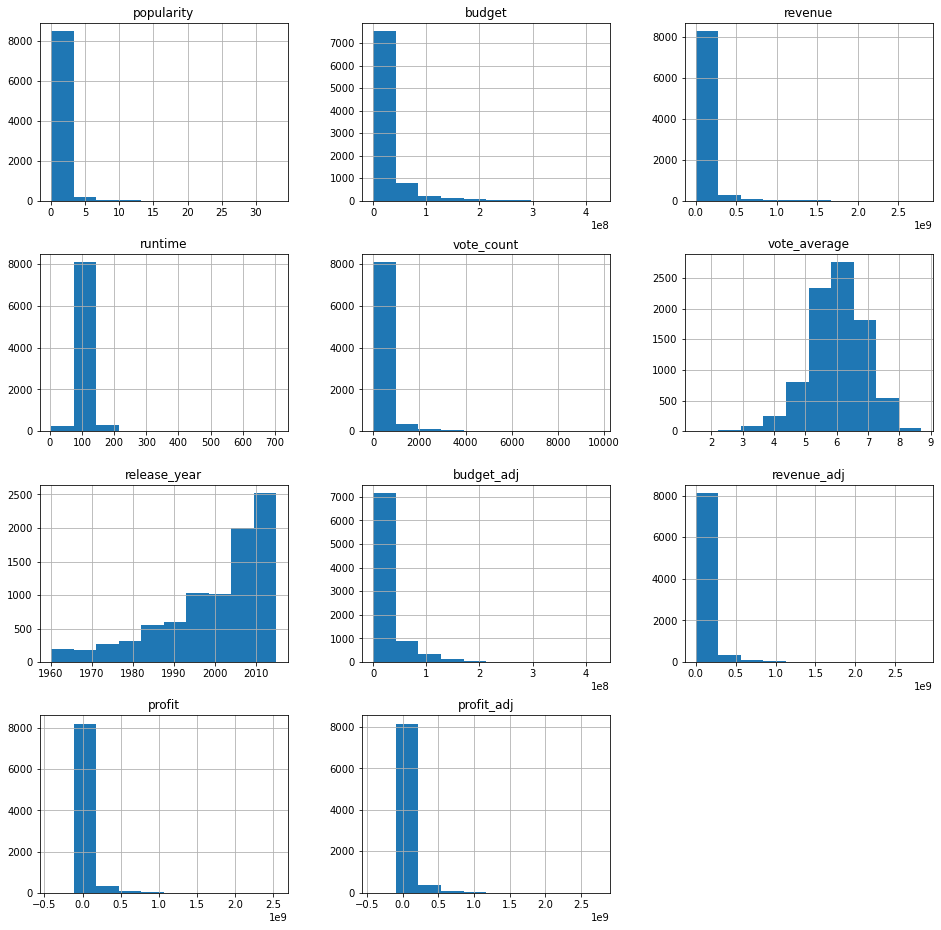

In [26]:
df.hist(figsize=(16,16));

# Exploratory Data Analysis
    Research Question 1 - Analyze trends in movie industry
    visualize some trends in the Movie industry (movies released, movies popularity, movies budget) over the years.

Text(0, 0.5, 'Count of movies released')

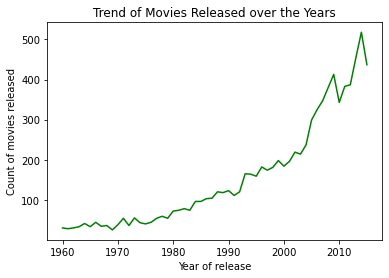

In [15]:
#Create df with the movie counts, grouped by year of release
df_counts_year = df.groupby(['release_year'], as_index=False)['original_title'].count()

#Plot
plt.plot(df_counts_year['release_year'],df_counts_year['original_title'], color='green')

#Set title of the plot and label for x and y axis
plt.title('Trend of Movies Released over the Years')
plt.xlabel('Year of release', fontsize = 10)
plt.ylabel('Count of movies released', fontsize = 10)

Text(0, 0.5, 'Popularity of movies released')

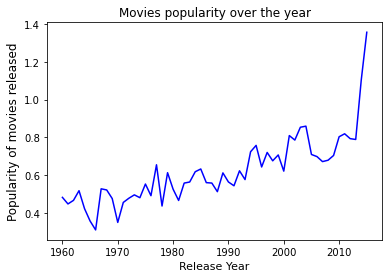

In [38]:
#Create df with the movie (mean) popularity, grouped by year of release
df_popularity_mean = df.groupby('release_year',as_index=False)['popularity'].mean()
##Plot
plt.plot(df_popularity_mean['release_year'],df_popularity_mean['popularity'],color='blue')
#Set title of the plot and label for x and y axis
plt.title('Movies popularity over the year')
plt.xlabel('Release Year',fontsize=11)
plt.ylabel('Popularity of movies released',fontsize=12)

Text(0, 0.5, 'Budget adj to inflation')

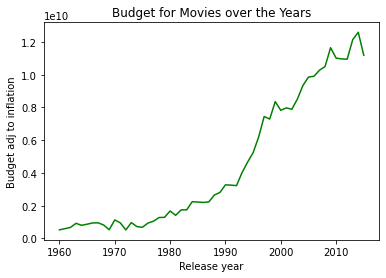

In [38]:
df_profits_adj = df.groupby('release_year', as_index=False)['budget_adj'].sum()

#Plot
plt.plot(df_profits_adj['release_year'],df_profits_adj['budget_adj'], color='green')

#Set title of the plot and label for x and y axis
plt.title('Budget for Movies over the Years')
plt.xlabel('Release year', fontsize = 10)
plt.ylabel('Budget adj to inflation', fontsize = 10)

from the graphs we can conculde "Movies released", "Mean Movie Popularity" and "Profit for Movies over the Years" are all in a raising trend.
if we analyze further,We can see Mean Movie Popularity is exponentially raised in the last 5 years.So we need to find out which genres contributed to sharp raise of popularity in the last 5 years.So next question we can pose as

# Research Question 2 : Analyze Genres Popularity

Analyze the genres popularity over the years.

We will answer

1. Which genre has the most movies released,ever?
2. which genres movies are most popular in the last 5 years?

First,we will check the genres column

In [16]:
#Counting values in 'genres'column 
df['genres'].groupby(df['genres']).count()

genres
Action                                     42
Action|Adventure                           12
Action|Adventure|Animation                  4
Action|Adventure|Animation|Comedy|Drama     1
Action|Adventure|Animation|Drama|Family     1
                                           ..
Western|Drama|Crime|Romance                 1
Western|History                             1
Western|History|War                         1
Western|Horror|Thriller                     1
Western|Thriller                            1
Name: genres, Length: 1783, dtype: int64

Initial data from Genres column need to split for further analysis
We will do this in next steps

In [22]:
##Split the column genre into multiple rows
df_split_genres = df.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True).stack().reset_index(level=1, 
                                                                                                drop=True).rename('genres'))
df_split_genres.head(5)


genres
Action             2021
Adventure          1270
Animation           512
Comedy             3048
Crime              1200
Documentary         268
Drama              3932
Family              946
Fantasy             762
Foreign              90
History             287
Horror             1337
Music               308
Mystery             702
Romance            1414
Science Fiction    1028
TV Movie            114
Thriller           2461
War                 235
Western             154
Name: genres, dtype: int64

In [29]:
#Finding the Max Ever produced count and putting into temp df
df_max_ever = df_split_genres.genres.value_counts()


##df_max_ever
#Renaming the columns of the result dataframe
df_max_ever = df_max_ever.rename_axis('genre').reset_index(name='movies_count')

#Preview the results of the max ever produced
df_max_ever.head()

,genre,movies_count
0,Drama,3932
1,Comedy,3048
2,Thriller,2461
3,Action,2021
4,Romance,1414


After Splitting and analyzing the results,Dram is the one which is most movies produced ever next comes the comedy,Thriller,Action and Romance
Lets Visualize

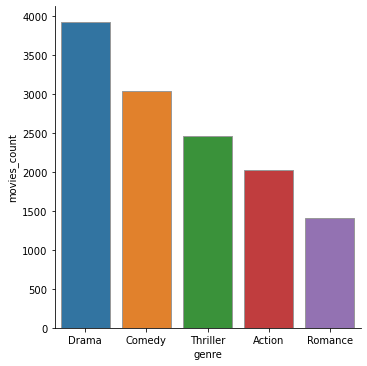

In [35]:
##Plot the 5 genres that are most often produced, ever
sns.catplot(x = "genre", y="movies_count" , kind="bar",
           edgecolor=".6",
            data=df_max_ever.head());

Need to find out which genres movies is more popular in the last 5 years

In [36]:
##group the movies based on release year,genres and calculate the mean
Popularity_Mean_movies =movies_df.groupby(['release_year','genres'],as_index=False).popularity.mean()
Popularity_Mean_movies

,release_year,genres,popularity
0,1960,Action,0.647264
1,1960,Adventure,0.700981
2,1960,Comedy,0.444597
3,1960,Crime,0.346479
4,1960,Drama,0.597252
...,...,...,...
1024,2015,Science Fiction,2.929048
1025,2015,TV Movie,0.278454
1026,2015,Thriller,1.835973
1027,2015,War,1.686373


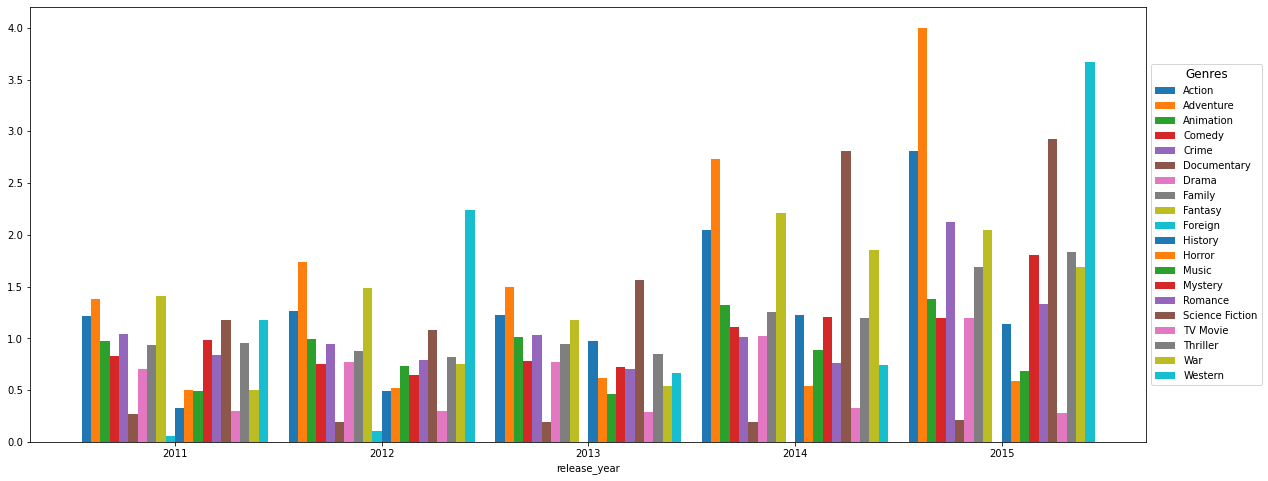

In [37]:
##Transform the dataframe       
movies_from_2010=Popularity_Mean_movies[Popularity_Mean_movies.release_year > 2010].pivot(index='release_year', columns='genres',values='popularity')

movies_from_2010.plot.bar(width=0.9, figsize=(20,8), rot =0)
plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5), title='Genres', title_fontsize=12)

Most popular movie from the last 5 years is Adventure

Next Query is which genre of movies are expensive to produce?

In [44]:
##Sum of budgets based on the release year and genres
df_genre_budget =movies_df.groupby(['release_year','genres'],as_index=False).budget_adj.sum()


df_genre_budget = pd.DataFrame(df_genre_budget)

df5_Action =  df_genre_budget[df_genre_budget['genres'] == 'Action']

df5_Adventure =   df_genre_budget[df_genre_budget['genres'] == 'Adventure']

df5_Drama = df_genre_budget[df_genre_budget['genres'] == 'Drama']



Based on number of movies produced ever. Action,Adventure,comedy and drama genres are considered.

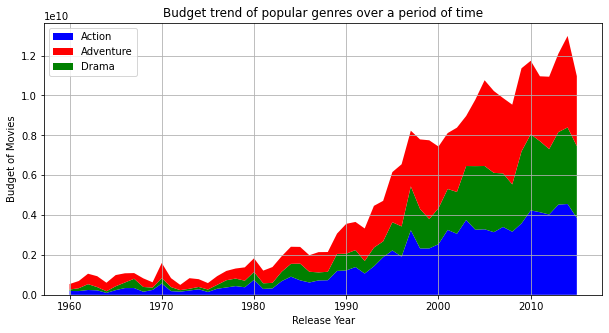

In [45]:

fig, ax = plt.subplots(figsize=(10,5))

x = df5_Action['release_year']

y = df5_Action['budget_adj']

x1 = df5_Adventure['release_year']

y1 = df5_Adventure['budget_adj']


x2 = df5_Drama['release_year']

y2 = df5_Drama['budget_adj']


plt.stackplot(x, y, x1,y1,x2,y2, labels = ["Action","Adventure","Drama"],colors = ['blue','r','green'])

ax.grid(True)

ax.legend(loc='upper left')

plt.xlabel("Release Year")

plt.ylabel("Budget of Movies")

plt.title("Budget trend of popular genres over a period of time")

plt.show()

Action,drama and Adventure buget getting expensive as the year passes,but to make a adventures move it is very expensive.Budget has steadily increased from 1960 to 2015.


# Conculsion

The Movie Industry is HOT.
Movies are more popular and there are more and more of them released over the years.
Drama Movies are the ones released the most over the years, but in the recent five years Adventure and Science Fiction Movies are gaining popularity.
Overall movie popularity for the recent five years is raising extremly fast.
Adventure movie is getting more expensive to produce and in last 5 year budget is increasing for adventure movies